In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
train = pd.read_csv("/content/sample_data/california_housing_train.csv")
test = pd.read_csv("/content/sample_data/california_housing_test.csv")

df = pd.concat([train, test])

df['position'] = np.sqrt((df['longitude'] + df['latitude'])*(df['longitude'] + df['latitude']))
df['value'] = np.log(df['median_house_value'])

newdf = df[["value", "position", "median_income"]]

,value,position,median_income
0,11.110954,80.12,1.4936
1,11.291031,80.07,1.8200
2,11.358608,80.87,1.6509
3,11.203679,80.93,3.1917
4,11.089805,81.00,1.9250


In [17]:
from math import radians, cos, sin, asin, sqrt

def single_pt_haversine(lat, lng, degrees=True):
    """
    'Single-point' Haversine: Calculates the great circle distance
    between a point on Earth and the (0, 0) lat-long coordinate
    """
    r = 6371 # Earth's radius (km). Have r = 3956 if you want miles

    # Convert decimal degrees to radians
    if degrees:
        lat, lng = map(radians, [lat, lng])

    # 'Single-point' Haversine formula
    a = sin(lat/2)**2 + cos(lat) * sin(lng/2)**2
    d = 2 * r * asin(sqrt(a))

    return d

In [18]:
newdf['harvesine_distance'] = [single_pt_haversine(x, y) for x, y in zip(df.longitude, df.latitude)]

<ipython-input-18-c8f193487e10>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf['harvesine_distance'] = [single_pt_haversine(x, y) for x, y in zip(df.longitude, df.latitude)]


In [19]:
newdf.head()

,value,position,median_income,harvesine_distance
0,11.110954,80.12,1.4936,12221.324718
1,11.291031,80.07,1.8200,12229.785501
2,11.358608,80.87,1.6509,12257.349741
3,11.203679,80.93,3.1917,12259.612459
4,11.089805,81.00,1.9250,12261.521890


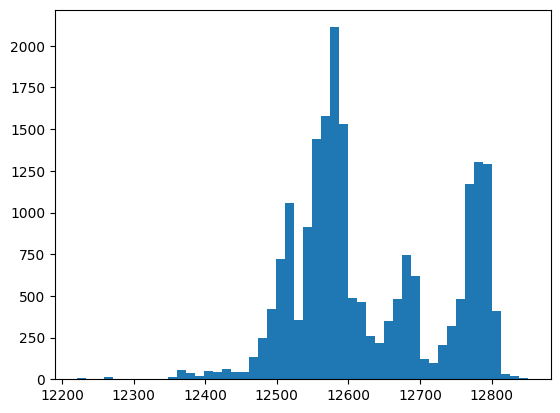

In [24]:
plt.hist(newdf.harvesine_distance, bins=50)
plt.show()

In [21]:
newdf.harvesine_distance.describe()

count    20000.000000
mean     12629.241004
std        104.950405
min      12221.324718
25%      12556.332765
50%      12590.702075
75%      12738.882487
max      12851.344147
Name: harvesine_distance, dtype: float64

In [ ]:
x = df['longitude']
y = df['latitude']
value = newdf['harvesine_distance']

price_bins = [0, 100000, 200000, 300000, 400000, 500000, 600000, 700000, 800000, 900000, 1000000, float('inf')]
colors = sns.color_palette("viridis", len(price_bins) - 1)

color_idx = pd.cut(value, bins=price_bins, labels=range(len(price_bins) - 1))

plt.figure(figsize=(10, 8))
plt.scatter(x, y, c=color_idx, cmap='plasma', alpha=0.7)
plt.colorbar(label='Median House Price')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('California Housing Prices by Location')
plt.grid(True)
plt.show()

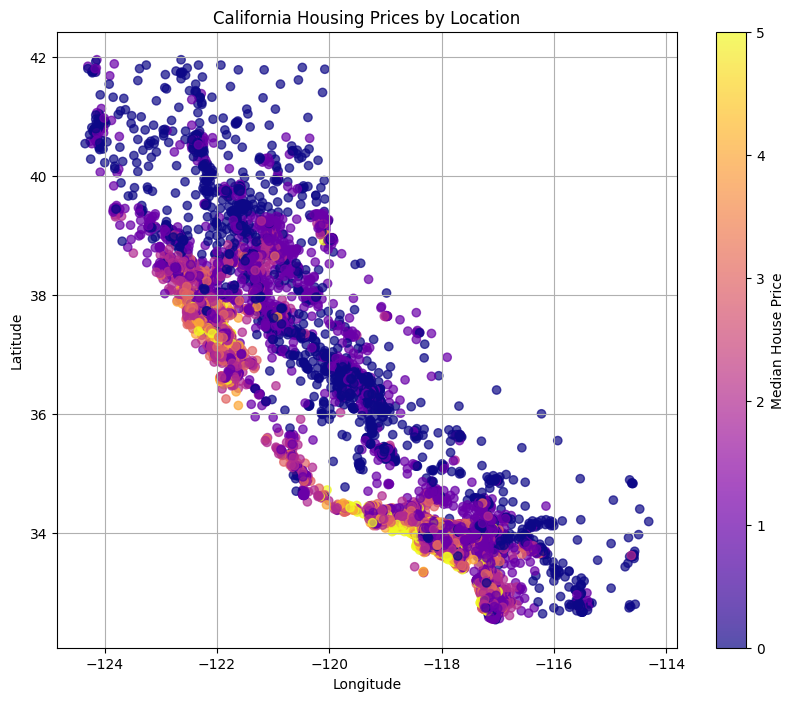

In [4]:
x = df['longitude']
y = df['latitude']
value = df['median_house_value']

price_bins = [0, 100000, 200000, 300000, 400000, 500000, 600000, 700000, 800000, 900000, 1000000, float('inf')]
colors = sns.color_palette("viridis", len(price_bins) - 1)

color_idx = pd.cut(value, bins=price_bins, labels=range(len(price_bins) - 1))

plt.figure(figsize=(10, 8))
plt.scatter(x, y, c=color_idx, cmap='plasma', alpha=0.7)
plt.colorbar(label='Median House Price')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('California Housing Prices by Location')
plt.grid(True)
plt.show()

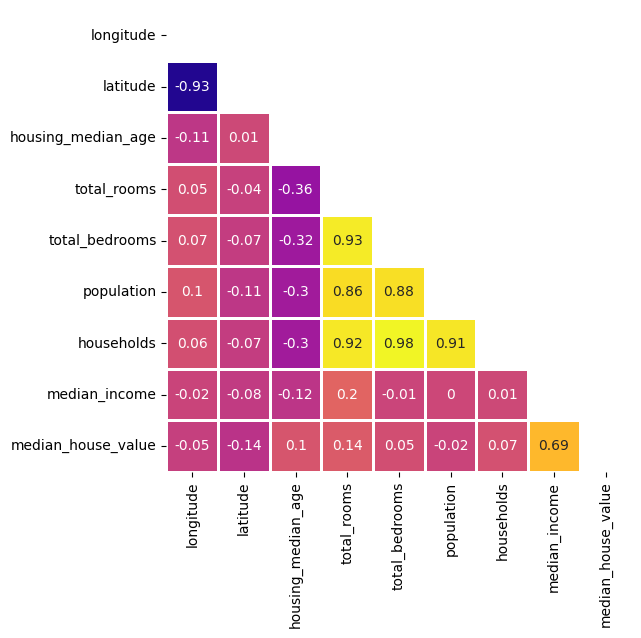

In [5]:
corr_mat = df.corr().round(2)
f, ax = plt.subplots(figsize=(6,6))
mask = np.zeros_like(corr_mat,dtype=bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr_mat,mask=mask,vmin=-1,vmax=1,center=0,
            cmap='plasma',square=False,lw=2,annot=True,cbar=False)
plt.show()

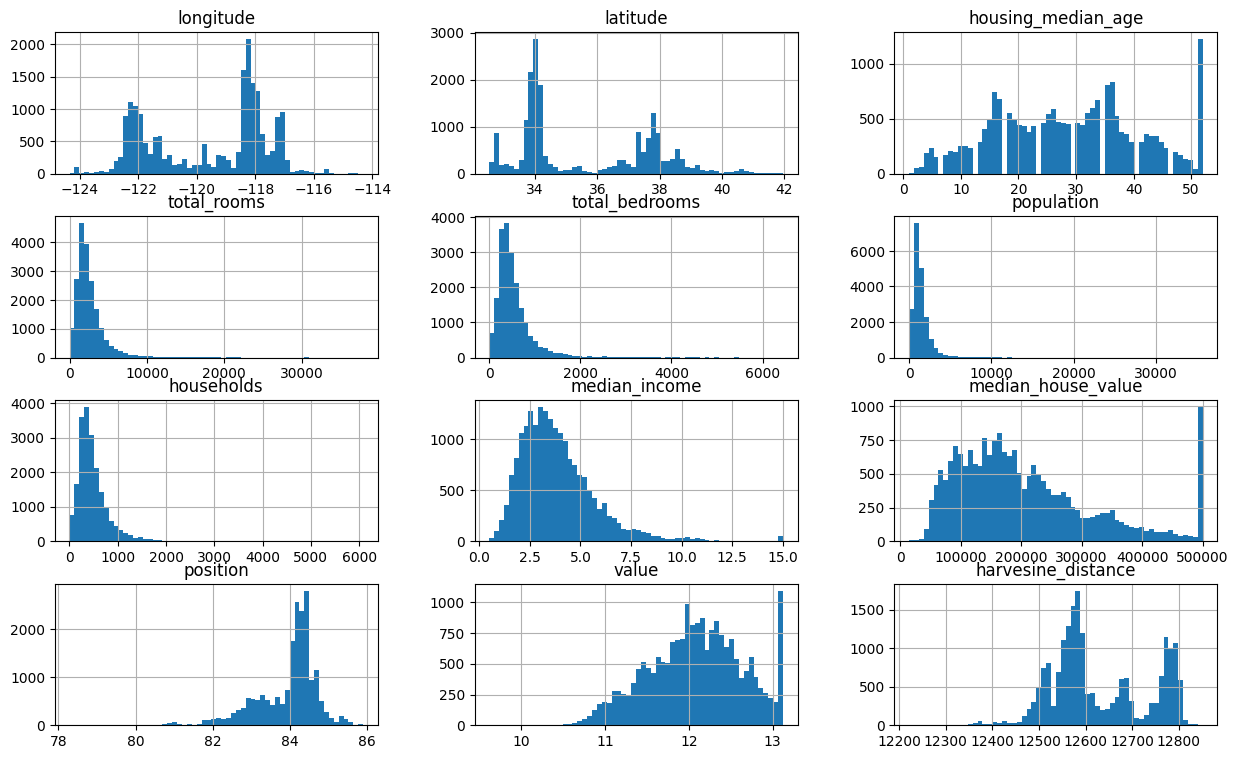

In [ ]:
df.hist(bins=60, figsize=(15,9));plt.show()